In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os
from mpl_toolkits.mplot3d import Axes3D

In [2]:
initial_data = yf.download("LUNA1-USD", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,5.361633,6.768265,5.353889,6.751053,6.751053,284275053
2021-03-02,6.750741,6.780756,6.232610,6.457235,6.457235,186109178
2021-03-03,6.472056,8.203225,6.439836,7.224770,7.224770,459813956
2021-03-04,7.213907,8.134108,7.113170,7.498445,7.498445,418936174
2021-03-05,7.474930,8.764044,6.996793,8.488712,8.488712,539816082


In [4]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,65.371521,73.292778,64.056122,73.172760,73.172760,4158265095
2022-02-26,73.162125,79.506538,72.423134,78.079483,78.079483,3159163058
2022-02-27,78.056442,78.802582,71.438904,72.642113,72.642113,3108800926
2022-02-28,72.596977,92.411346,70.566589,91.138588,91.138588,5007692834
2022-03-01,91.169342,94.409637,86.275589,89.535759,89.535759,4662381579


In [6]:
initial_data['Adj Close'].head()

Date
2021-03-01    6.751053
2021-03-02    6.457235
2021-03-03    7.224770
2021-03-04    7.498445
2021-03-05    8.488712
Name: Adj Close, dtype: float64

In [7]:
data =  initial_data['Adj Close']

In [8]:
data.head()

Date
2021-03-01    6.751053
2021-03-02    6.457235
2021-03-03    7.224770
2021-03-04    7.498445
2021-03-05    8.488712
Name: Adj Close, dtype: float64

In [9]:
data.tail()

Date
2022-02-25    73.172760
2022-02-26    78.079483
2022-02-27    72.642113
2022-02-28    91.138588
2022-03-01    89.535759
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

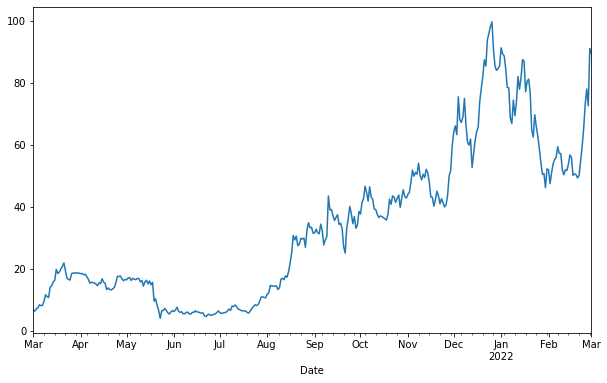

In [10]:
data.plot(figsize=(10, 6), subplots=True)

In [11]:
data.describe().round(2)

count    366.00
mean      33.92
std       24.84
min        4.11
25%       13.71
50%       30.75
75%       50.60
max       99.72
Name: Adj Close, dtype: float64

In [12]:
data.diff().head()

Date
2021-03-01         NaN
2021-03-02   -0.293818
2021-03-03    0.767535
2021-03-04    0.273675
2021-03-05    0.990267
Name: Adj Close, dtype: float64

In [13]:
data.diff().describe().round(2)

count    365.00
mean       0.23
std        3.13
min      -12.15
25%       -0.95
50%        0.05
75%        1.27
max       18.50
Name: Adj Close, dtype: float64

In [14]:
data.pct_change().round(4).head()

Date
2021-03-01       NaN
2021-03-02   -0.0435
2021-03-03    0.1189
2021-03-04    0.0379
2021-03-05    0.1321
Name: Adj Close, dtype: float64

In [15]:
data = pd.DataFrame(data)

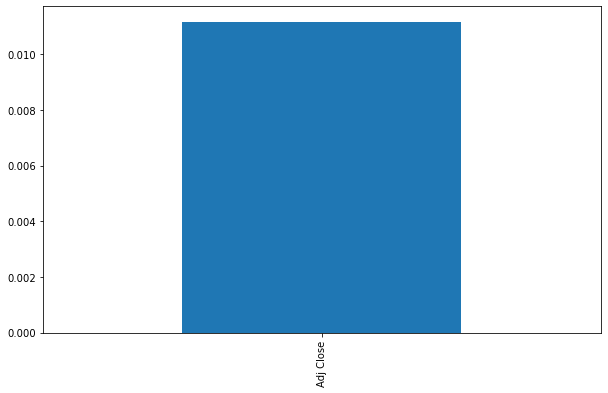

In [16]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [17]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2021-03-01,NaN
2021-03-02,-0.0445
2021-03-03,0.1123
2021-03-04,0.0372
2021-03-05,0.1240


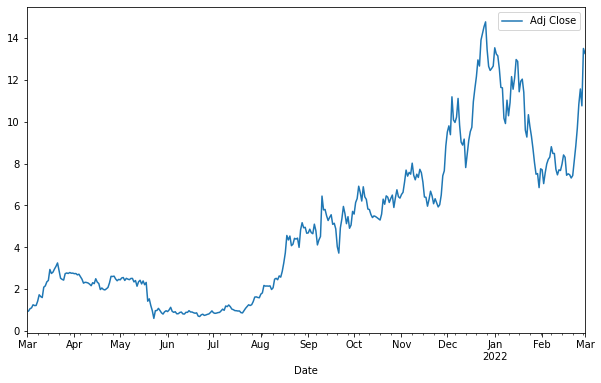

In [18]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [19]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2021-03-07,8.271160
2021-03-14,15.874853
2021-03-21,21.982670
2021-03-28,18.587406
2021-04-04,18.347498


In [20]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2021-03-31,18.700575
2021-04-30,16.687428
2021-05-31,6.563471
2021-06-30,6.522355
2021-07-31,10.757215


<AxesSubplot:xlabel='Date'>

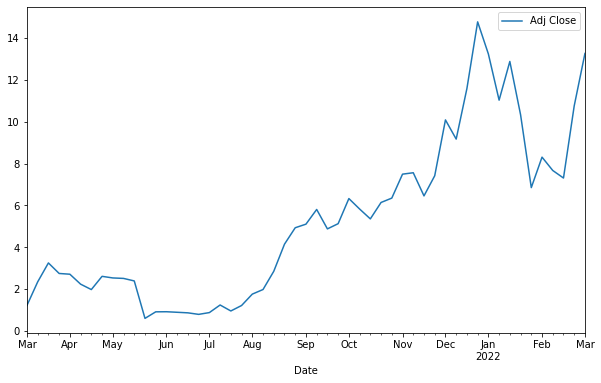

In [21]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

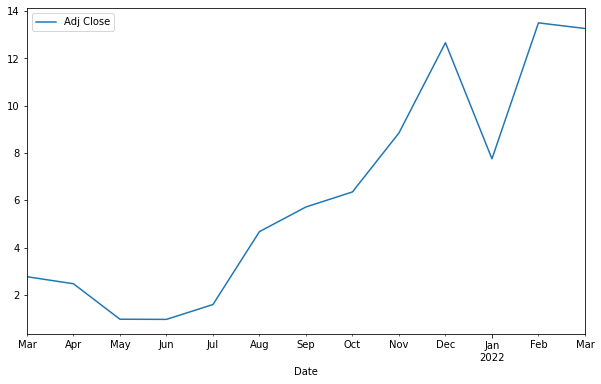

In [22]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [23]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1))
vol_h = np.sqrt(366) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 171.87 %


In [24]:
S0 = 89.54	              # spot stock price
K = 92.0               # strike
T = 1/12                 # maturity 
r = 0.0166                 # risk free rate 
sig = 1.72               # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [25]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [26]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [27]:
S

array([[ 89.54      , 114.77182978, 147.11383639, 188.56962462,
        241.70740293],
       [  0.        ,  69.85522158,  89.54      , 114.77182978,
        147.11383639],
       [  0.        ,   0.        ,  54.49801186,  69.85522158,
         89.54      ],
       [  0.        ,   0.        ,   0.        ,  42.5169834 ,
         54.49801186],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         33.16990503]])

In [28]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.43894119534333714

In [29]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.46      ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 37.50198814],
       [ 0.        ,  0.        ,  0.        ,  0.        , 58.83009497]])

In [30]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[18.32843418,  7.63516739,  0.77384055,  0.        ,  0.        ],
       [ 0.        , 26.70555071, 13.00779487,  1.37972742,  0.        ],
       [ 0.        ,  0.        , 37.43837681, 22.11296726,  2.46      ],
       [ 0.        ,  0.        ,  0.        , 49.45120543, 37.50198814],
       [ 0.        ,  0.        ,  0.        ,  0.        , 58.83009497]])

In [31]:
print('European ' + payoff, str( V[0,0]))

European put 18.328434176596303


In [32]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [33]:
T = 1/12
r = 0.0166
sigma = 1.72
S0 = 89.54
K = 92

In [34]:
S = mcs_simulation_np(1000)

In [35]:
S = np.transpose(S)
S

array([[ 89.54      ,  89.69058739,  90.90537747, ...,  86.23612622,
         85.08197847,  85.24974742],
       [ 89.54      ,  88.96233823,  90.2829352 , ...,  72.92246361,
         73.25666344,  73.29891739],
       [ 89.54      ,  88.37556091,  88.1460533 , ...,  78.25123549,
         79.28148652,  78.56889311],
       ...,
       [ 89.54      ,  92.11288345,  93.20620012, ...,  23.91273356,
         23.58955554,  23.63759204],
       [ 89.54      ,  87.51000406,  86.80095501, ..., 159.54792099,
        160.89403719, 161.67369041],
       [ 89.54      ,  88.37825357,  89.5659095 , ...,  72.52669334,
         73.62710085,  73.98573175]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

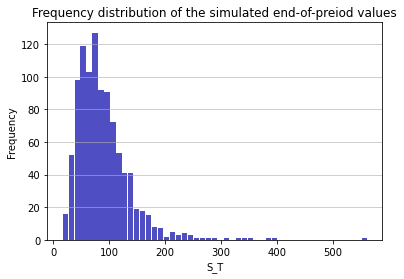

In [36]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [37]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 19.422233647025976


In [38]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [39]:
S = np.linspace(10, 200, 50)
T = np.linspace(0.5, 2, 50)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 92, T[i], 0.0166, 0, 1.72, 'put')

C:\Users\muham\AppData\Local\Temp/ipykernel_19660/2385648502.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


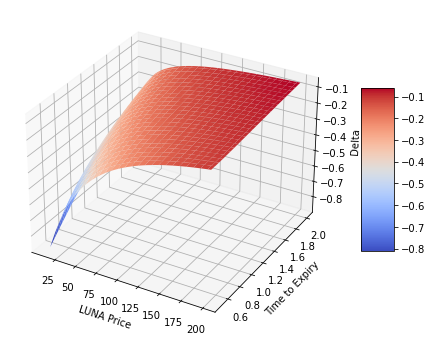

In [40]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('LUNA Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [41]:
d = delta(89.54, 92, 1/12, 0.0166, 0, 1.72, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is -0.4221 . If the stock price increase 1 dollar, then the value of the option will increase $ -0.4221 .


In [42]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [43]:
gamma(89.54, 92, 1/12, .0166, 0, 1.72, 'put')

0.008789682613904939

In [44]:
S = np.linspace(10, 200, 50)
T = np.linspace(0.5, 2, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 92, T[i], 0.0166, 0, 1.72, 'put')

C:\Users\muham\AppData\Local\Temp/ipykernel_19660/2953207390.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


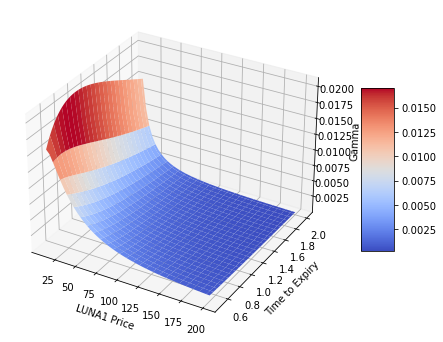

In [45]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('LUNA1 Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [46]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [47]:
speed(89.54, 92, 1/12, .0166, 0, 1.72, 'put')

-3.960502576044849e-05

In [48]:
S = np.linspace(10, 200, 50)
T = np.linspace(0.5, 2, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 92, T[i], .0166, 0, 1.72, 'put')

C:\Users\muham\AppData\Local\Temp/ipykernel_19660/1319834172.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


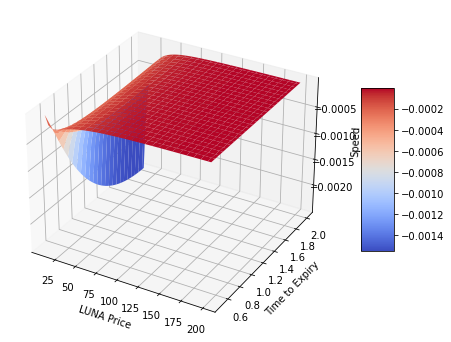

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('LUNA Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [50]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [51]:
theta(89.54, 92, 1/12, .0166, 0, 1.72, 'put')

105.32667201720488

In [52]:
S = np.linspace(10, 200, 50)
T = np.linspace(0.5, 2, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 92, T[i], .0166, 0, 1.72, 'put')

C:\Users\muham\AppData\Local\Temp/ipykernel_19660/178598223.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


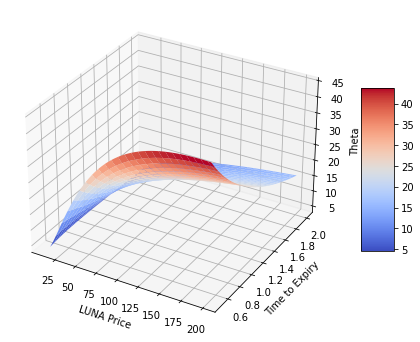

In [53]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('LUNA Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [54]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [55]:
rho(89.54, 92, 1/12, .0166, 0, 1.72, 'put')

-4.730949080080548

In [56]:
S = np.linspace(10, 200, 50)
r = np.linspace(1, 2, 50)
Rho = np.zeros((len(r),len(S)))
for j in range(len(S)):
    for i in range(len(r)):
        Rho[i,j] = rho(S[j], 92, 1/12, r[i], 0, 1.72, 'put')

C:\Users\muham\AppData\Local\Temp/ipykernel_19660/1397985943.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


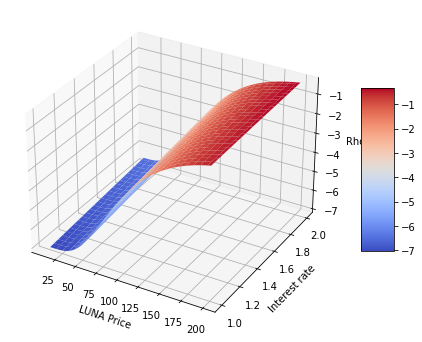

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, r = np.meshgrid(S, r)
surf = ax.plot_surface(S, r, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('LUNA Price')
ax.set_ylabel('Interest rate')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);